## Linear Regression for the stackloss Dataset

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

FileNotFoundError: Could not find module 'C:\Users\35389\anaconda3\Lib\site-packages\sklearn\.libs\vcomp140.dll' (or one of its dependencies). Try using the full path with constructor syntax.

## Read in the Data

In [14]:
DF = pd.read_csv("data/stackloss.csv")
DF.head()

,AirFlow,WaterTemp,AcidConc,StackLoss
0,80,27,89,42
1,80,27,88,37
2,75,25,90,37
3,62,24,87,28
4,62,22,87,18


## Explore Data

In [15]:
DF.describe()

,AirFlow,WaterTemp,AcidConc,StackLoss
count,21.000000,21.000000,21.000000,21.000000
mean,60.428571,21.095238,86.285714,17.523810
std,9.168268,3.160771,5.358571,10.171623
min,50.000000,17.000000,72.000000,7.000000
25%,56.000000,18.000000,82.000000,11.000000
50%,58.000000,20.000000,87.000000,15.000000
75%,62.000000,24.000000,89.000000,19.000000
max,80.000000,27.000000,93.000000,42.000000


## Values of count mean no missing values. Seems to be a small number of large values for stackloss.

In [16]:
DF.corr()

,AirFlow,WaterTemp,AcidConc,StackLoss
AirFlow,1.000000,0.781852,0.500143,0.919663
WaterTemp,0.781852,1.000000,0.390940,0.875504
AcidConc,0.500143,0.390940,1.000000,0.399830
StackLoss,0.919663,0.875504,0.399830,1.000000


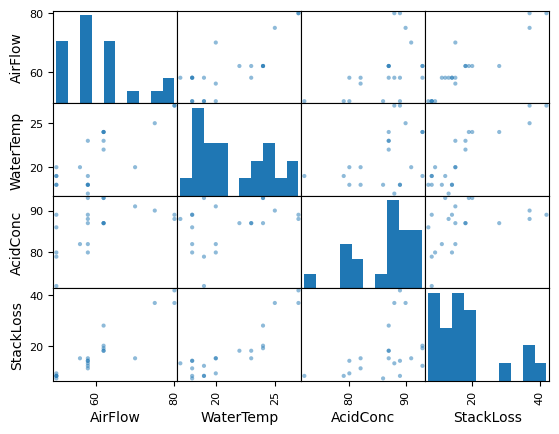

In [17]:
scatter_matrix(DF)
plt.show()
# plt.savefig('plots/p3stacklossScatter.png')

## There might be a non_linear relationship between WaterTemp and Stackloss

## Prepare tje Data

In [18]:
# X = DF[['AirFlow', 'WaterTemp', 'AcidConc']]
# y = DF['StackLoss']

X = DF.drop(columns = 'StackLoss')
y = DF. StackLoss


## Spliting data into Train and Test

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)
print(X_train.shape)

(15, 3)


## Build the Model

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print("R^2: ", model.score(X_train, y_train))

yhat = model.predict(X_test)
print("RMSE: ", root_mean_squared_error(y_test, yhat))


intercept: -36.69140840591724
slope: [ 0.81826835  1.20212439 -0.24889254]
R^2:  0.9218135763620641
RMSE:  3.772926357336113


## Make a predictions

**Typing prediction error of 3.77**

In [22]:
newData= [[72, 20, 85], [75, 25, 80]]


newDF = pd.DataFrame(newData, columns = ['AirFlow', 'WaterTemp', 'AcidConc'])
# print(newDF)
y_hat = model.predict(newDF)
print('y_hat', y_hat)



y_hat [25.11053454 34.82042425]


** Increase of AirFlow puched up by 2.5, WaterTemp pushes up by 6, AcidConc pushes up by 1**